In [1]:
import pandas as pd
# Load the ASDA dataset
asda_data = pd.read_csv('/Users/purvi/Downloads/CapstoneSpring2024/UK_SuperMarket/All_Data_ASDA.csv')  # Adjust the file path if needed

# Display the first few rows to ensure it's loaded correctly
asda_data.head()

/var/folders/1s/ll25zv1x4939zjl8v9j5kqm40000gn/T/ipykernel_7183/3349668511.py:3: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  asda_data = pd.read_csv('/Users/purvi/Downloads/CapstoneSpring2024/UK_SuperMarket/All_Data_ASDA.csv')  # Adjust the file path if needed


,supermarket,prices_(¬£),prices_unit_(¬£),unit,names,date,category,own_brand
0,ASDA,1.09,0.14,unit,ASDA Garden Gang Brilliant Bananas,20240211,fresh_food,True
1,ASDA,1.29,0.26,unit,ASDA Organic Fairtrade Bananas,20240211,fresh_food,True
2,ASDA,2.45,4.90,kg,ASDA Frozen For Freshness Fruit Salad 500g,20240211,fresh_food,True
3,ASDA,3.00,7.50,kg,ASDA Subtly Sweet Chestnuts 400g,20240211,fresh_food,True
4,ASDA,1.25,25.00,l,Colgate Kids Mild Fruit Baby Toothpaste 0-2 Years,20240211,fresh_food,False


In [2]:
# Get a concise summary of the DataFrame
asda_data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 834899 entries, 0 to 834898
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   supermarket       834899 non-null  object 
 1   prices_(¬£)       834896 non-null  float64
 2   prices_unit_(¬£)  834824 non-null  float64
 3   unit              834824 non-null  object 
 4   names             834879 non-null  object 
 5   date              834899 non-null  int64  
 6   category          834899 non-null  object 
 7   own_brand         834879 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 51.0+ MB


In [3]:
# Get a quick statistical overview of numerical columns
asda_data.describe()



,prices_(¬£),prices_unit_(¬£),date
count,834896.000000,834824.000000,8.348990e+05
mean,5.748917,74.468760,2.024015e+07
std,9.373342,1135.487599,3.976175e+01
min,0.050000,0.000000,2.024011e+07
25%,1.700000,3.400000,2.024012e+07
50%,3.000000,7.500000,2.024012e+07
75%,6.500000,15.600000,2.024020e+07
max,479.990000,99778.000000,2.024021e+07


In [4]:
# Check for missing values
asda_data.isnull().sum()

supermarket          0
prices_(¬£)          3
prices_unit_(¬£)    75
unit                75
names               20
date                 0
category             0
own_brand           20
dtype: int64

In [5]:
# Correcting data types: Convert the 'date' column to datetime format
asda_data['date'] = pd.to_datetime(asda_data['date'], format='%Y%m%d')

In [6]:
# Renaming the columns
asda_data.rename(columns={'prices_(¬£)': 'prices_pounds', 'prices_unit_(¬£)': 'per_unit_price'}, inplace=True)

In [7]:
asda_data.head()

,supermarket,prices_pounds,per_unit_price,unit,names,date,category,own_brand
0,ASDA,1.09,0.14,unit,ASDA Garden Gang Brilliant Bananas,2024-02-11,fresh_food,True
1,ASDA,1.29,0.26,unit,ASDA Organic Fairtrade Bananas,2024-02-11,fresh_food,True
2,ASDA,2.45,4.90,kg,ASDA Frozen For Freshness Fruit Salad 500g,2024-02-11,fresh_food,True
3,ASDA,3.00,7.50,kg,ASDA Subtly Sweet Chestnuts 400g,2024-02-11,fresh_food,True
4,ASDA,1.25,25.00,l,Colgate Kids Mild Fruit Baby Toothpaste 0-2 Years,2024-02-11,fresh_food,False


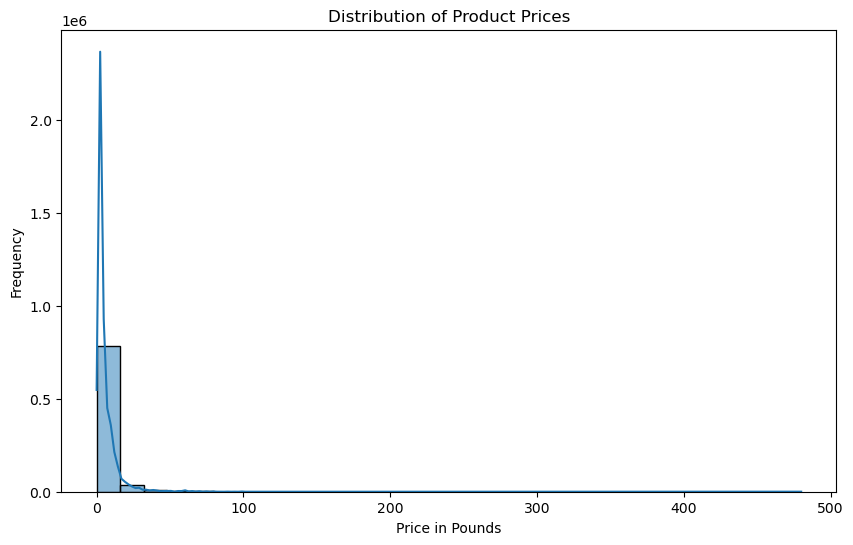

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Overall Price Distribution using a Histogram
plt.figure(figsize=(10, 6))
sns.histplot(asda_data['prices_pounds'], bins=30, kde=True)
plt.title('Distribution of Product Prices')
plt.xlabel('Price in Pounds')
plt.ylabel('Frequency')
plt.show()



In [ ]:
plt.figure(figsize=(14, 10))
sns.violinplot(x='prices_pounds', y='category', data=asda_data[asda_data['category'].isin(top_categories)], scale='width', inner='quartile', cut=0)
plt.title('Price Distribution Across Top Categories (Violin Plot)')
plt.xlabel('Price in Pounds')
plt.ylabel('Category')
plt.show()

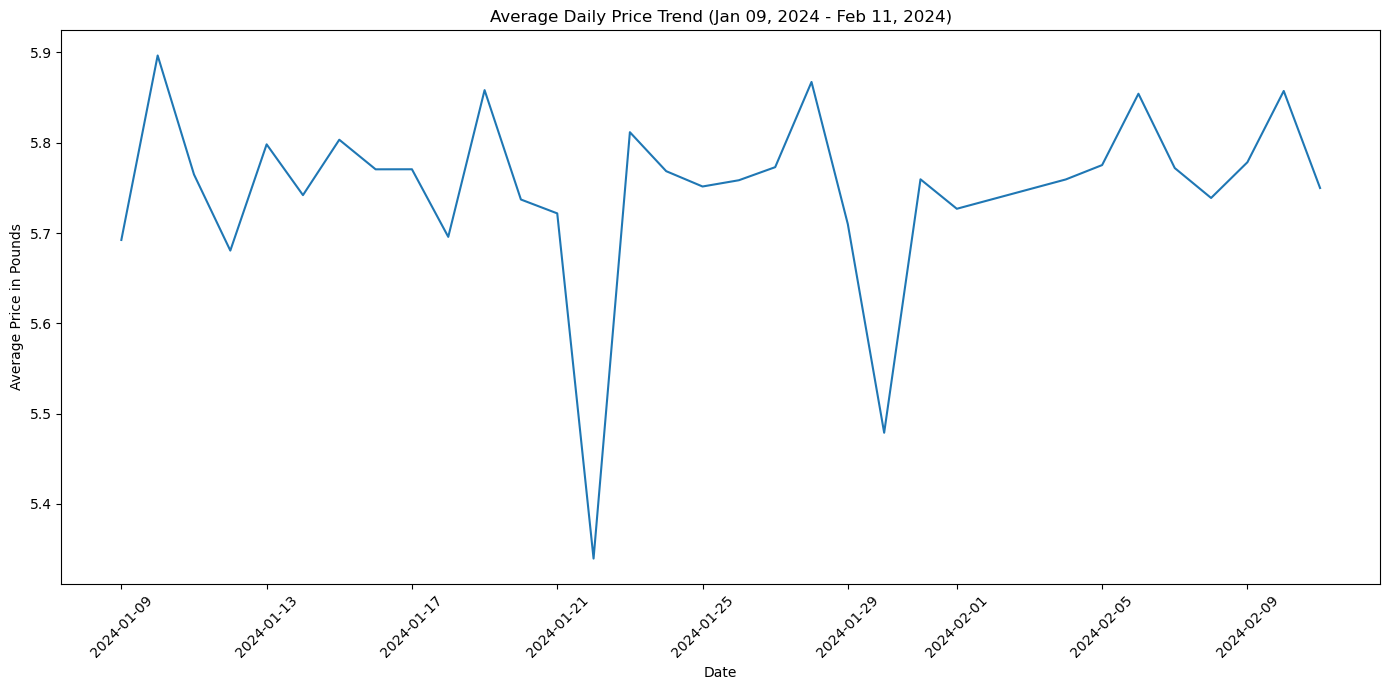

In [11]:
# Price Trends Over Time
# Adjusting for daily price trends
asda_data['date'] = pd.to_datetime(asda_data['date'])  # Ensure 'date' is in datetime format
daily_price_trends = asda_data.groupby(asda_data['date'])['prices_pounds'].mean().reset_index()

plt.figure(figsize=(14, 7))
sns.lineplot(data=daily_price_trends, x='date', y='prices_pounds')
plt.title('Average Daily Price Trend (Jan 09, 2024 - Feb 11, 2024)')
plt.xlabel('Date')
plt.ylabel('Average Price in Pounds')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjusts plot parameters to give some padding and prevent overlap
plt.show()

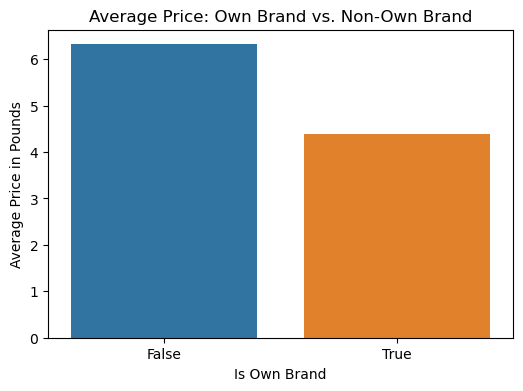

In [10]:
# Average Price Comparison: Own Brand vs. Non-Own Brand
own_brand_prices = asda_data.groupby('own_brand')['prices_pounds'].mean().reset_index()

plt.figure(figsize=(6, 4))
sns.barplot(x='own_brand', y='prices_pounds', data=own_brand_prices)
plt.title('Average Price: Own Brand vs. Non-Own Brand')
plt.xlabel('Is Own Brand')
plt.ylabel('Average Price in Pounds')
plt.show()

/var/folders/1s/ll25zv1x4939zjl8v9j5kqm40000gn/T/ipykernel_7183/1592231887.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='brand_type', y='prices_pounds', data=asda_data, estimator=np.mean, ci=None)


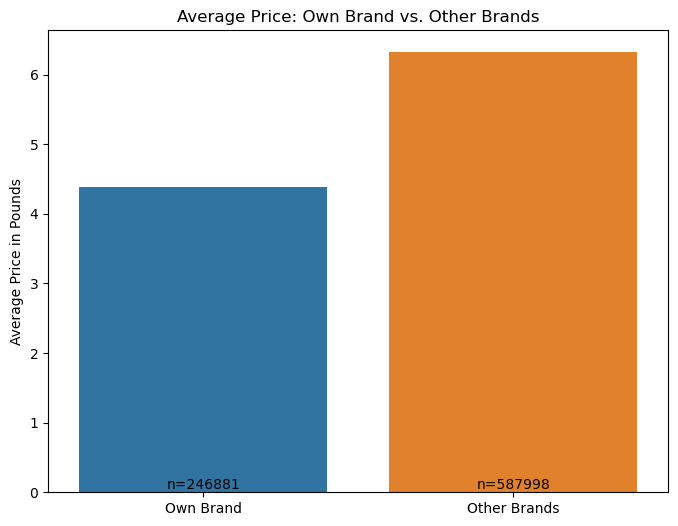

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



# Create a more descriptive label for 'own_brand'
asda_data['brand_type'] = asda_data['own_brand'].apply(lambda x: 'Own Brand' if x else 'Other Brands')

# Plotting with enhanced labeling and product count
plt.figure(figsize=(8, 6))
sns.barplot(x='brand_type', y='prices_pounds', data=asda_data, estimator=np.mean, ci=None)
plt.title('Average Price: Own Brand vs. Other Brands')
plt.xlabel('')
plt.ylabel('Average Price in Pounds')

# Adding text annotations for the number of products
num_own_brand = len(asda_data[asda_data['own_brand'] == True])
num_other_brands = len(asda_data[asda_data['own_brand'] == False])
total_counts = [num_own_brand, num_other_brands]
for index, value in enumerate(total_counts):
    plt.text(index, 0, f'n={value}', ha='center', va='bottom', color='black')

plt.show()